# ML Regression Model to predict crime rate
By Esteban Cambronero

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [19]:
SMAdata = pd.read_csv('E:\\Documents\\Data Science\\DPhi Bootcamp\\Standard Metropolitan Areas Data - train_data - data.csv')

# EDA

In [20]:
SMAdata.info() #We can see there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land_area       99 non-null     int64  
 1   percent_city    99 non-null     float64
 2   percent_senior  99 non-null     float64
 3   physicians      99 non-null     int64  
 4   hospital_beds   99 non-null     int64  
 5   graduates       99 non-null     float64
 6   work_force      99 non-null     float64
 7   income          99 non-null     int64  
 8   region          99 non-null     int64  
 9   crime_rate      99 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


In [21]:
SMAdata.head(5) #Also, no need to change the format of  any of our columns

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [22]:
SMAdata["crime_rate"].describe() #Now we can see the mean of our target variable, and some other information. If we look
                                #to the percentile values, we could guess it follows a normal distribution. We will check
                                #that out

count    99.000000
mean     55.643030
std      13.470943
min      23.320000
25%      46.115000
50%      56.060000
75%      63.860000
max      85.620000
Name: crime_rate, dtype: float64

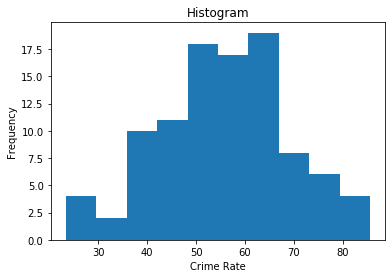

In [24]:
plt.title("Histogram")
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")

plt.hist(SMAdata.crime_rate)
plt.show()

As you may see, it follows indeed something very similar to the normal distribution

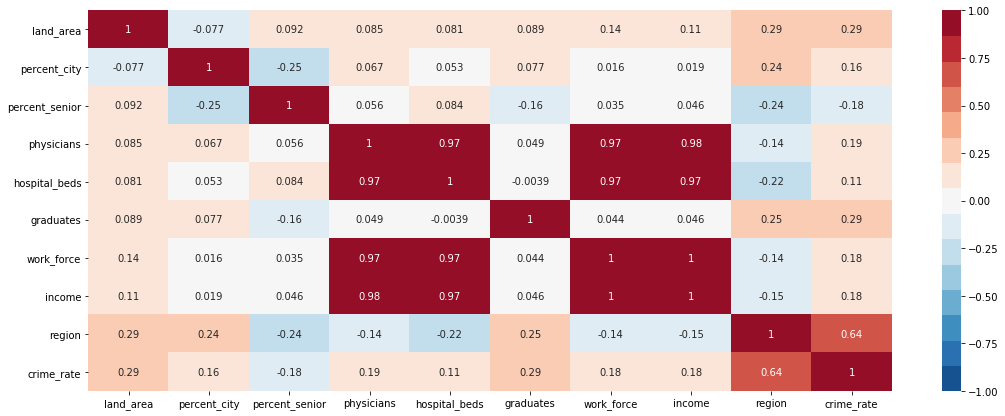

In [25]:
plt.figure(figsize=(18,7))
sns.heatmap(SMAdata.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

By this point we can see there is a medium correlation between the region and the crime_rate, and it was also sorprising that there is a low correlation between income and crime_rate

# Separating variables and spliting data

In [26]:
X = SMAdata.drop('crime_rate', axis = 1)
y = SMAdata['crime_rate']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Building the model

In [28]:
from sklearn.tree import DecisionTreeRegressor
first_model = DecisionTreeRegressor(random_state = 26)
first_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=26, splitter='best')

Then, we shall proceed with the evaluation of the model

print("Making predictions for the following 5 houses:")
print(y.head())
print("The predictions are")
print(first_model.predict(X.head()))

At a first sight the first value prediction is far from the real one, but, the next 3 are exactly the same. So, lets use a measurment of precisión of a the prediction for a linear regression, in this case, r^2 

In [32]:
from sklearn.metrics import r2_score
y_true = y
y_predict = first_model.predict(X)
r2_score(y_true, y_predict)

0.7003223495465085

# Conclusion
A perfect prediction would the one with an R^2 value of 1. Since our value is 0,7 we will consider our first model a satisfactory.